In [10]:
import networkx as nx
import fast_model_improved as fmi
import experiment_framework as ef
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

In [11]:
graph_type = "erdos_renyi_graph"
num_nodes = 1000
influencers_cascade_steps = 3
num_influencers = 20
k_deinfluencers_ls = [0,1,2,3,4,5,6,7,8,9]  # Different values of k to test
general_cascade_steps = 3
num_avg_runs = 5

In [12]:
G = nx.gnm_random_graph(num_nodes, 4000)
model = ef.run_influence_cascade(G, num_influencers=num_influencers, steps=influencers_cascade_steps, selection_method='random')
num_edges = G.number_of_edges()

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 834
Number of deinfluenced nodes: 0
Number of susceptible nodes: 166
influencer {394, 138, 396, 789, 279, 795, 300, 940, 943, 185, 953, 316, 703, 452, 726, 982, 986, 487, 241, 887}


In [13]:
deinfluencers_list = ef.select_deinfluencers(k_deinfluencers_ls, model_fixed_influencers)
results = ef.average_results(deinfluencers_list, model_fixed_influencers, num_runs=num_avg_runs, steps=general_cascade_steps)

/var/folders/m4/rndkh84x7l7_zhb99lhzjcqw0000gn/T/ipykernel_4194/3261196790.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


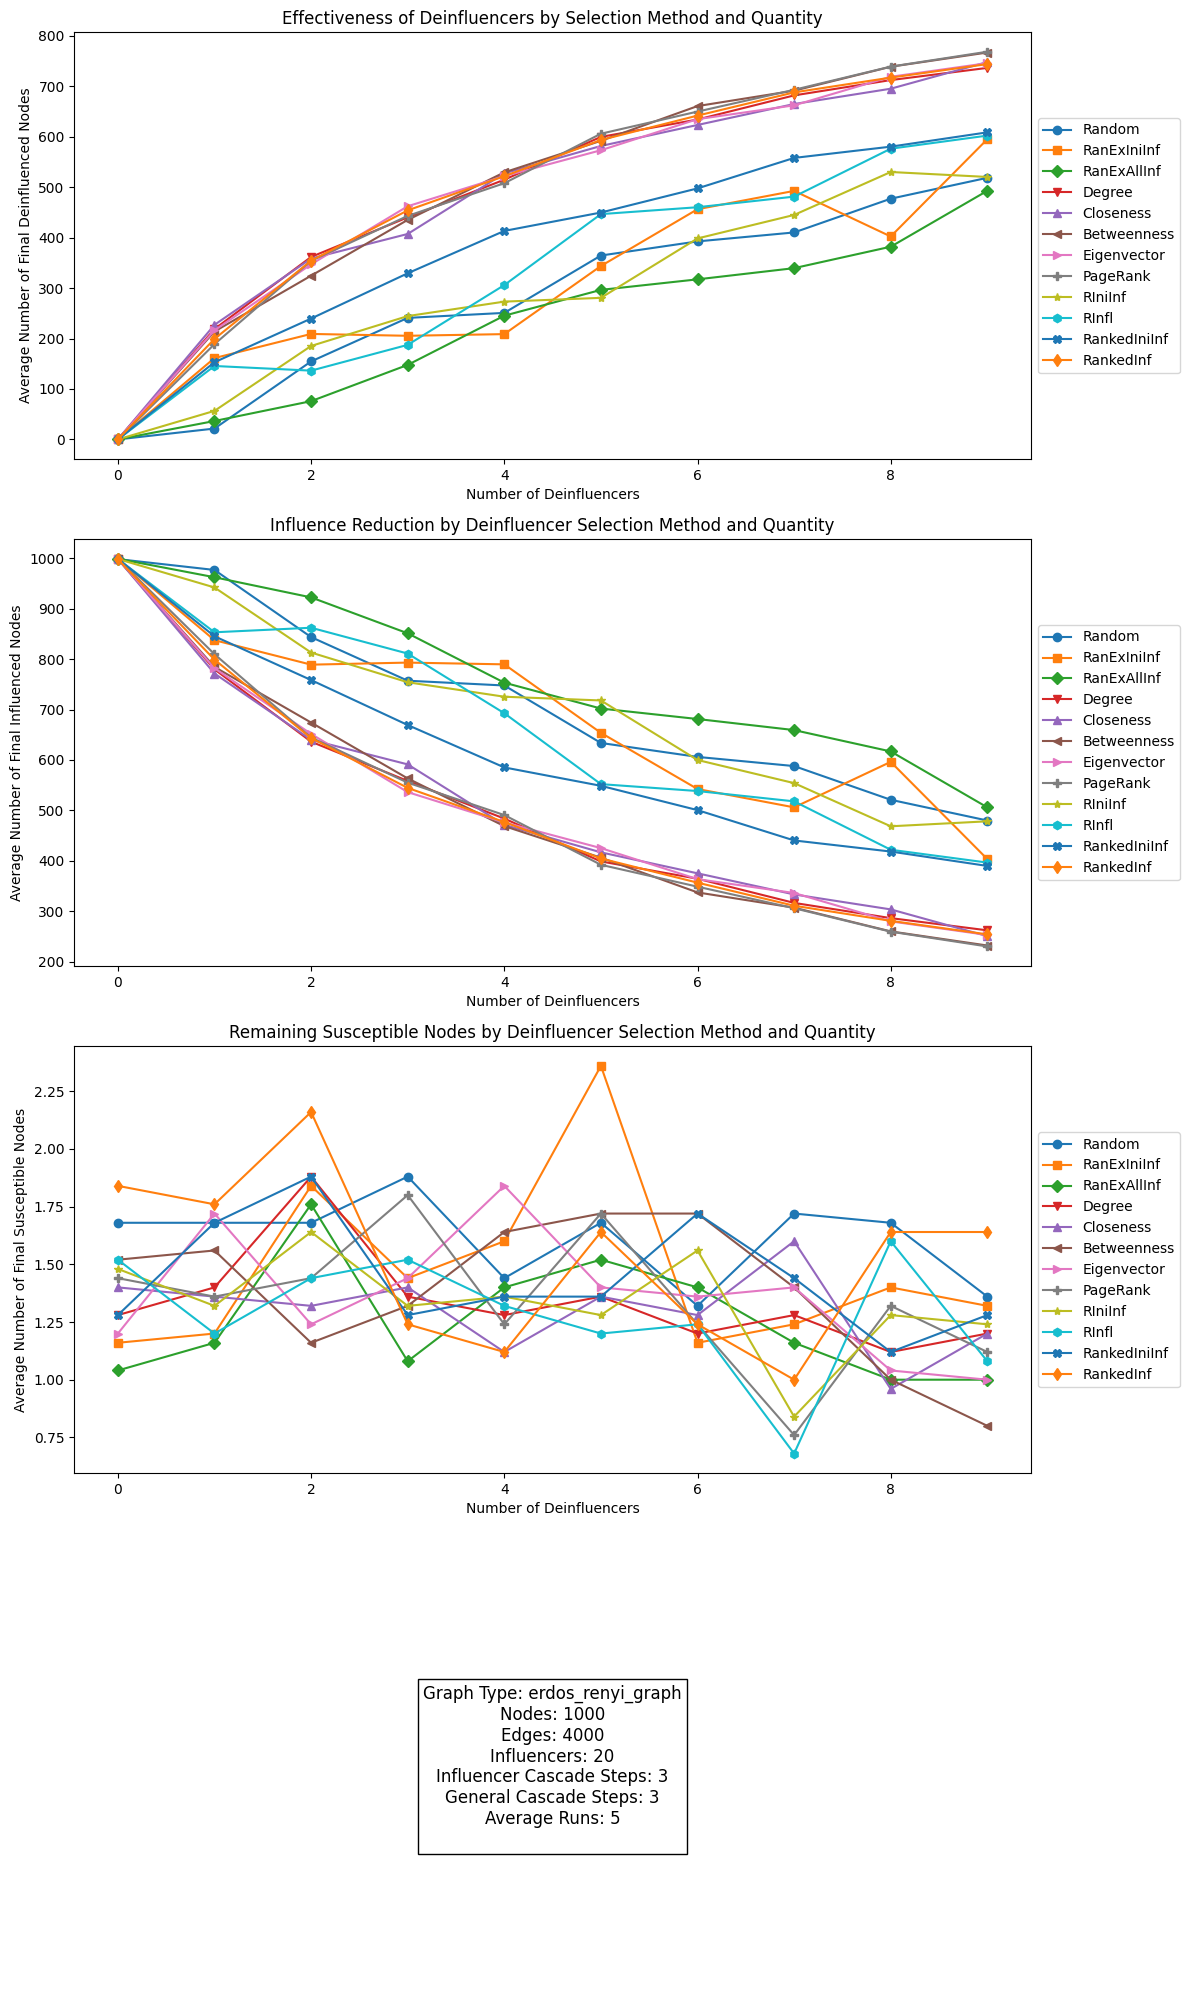

In [14]:
# Define different marker styles for each method
marker_styles = {
    'Random': 'o',
    'RdExIniInf': 's',
    'RdExAllInf': 'D',
    'Degree': 'v',
    'Closeness': '^',
    'Betweenness': '<',
    'Eigenvector': '>',
    'PageRank': 'P',
    'RdIniInf': '*',
    'RdAllInf': 'h',
    'RkIniInf': 'X',
    'RkAllInf': 'd'
}

# Create subplots, including an additional one for the info box
fig, axs = plt.subplots(4, 1, figsize=(12, 20))

# Set titles for individual subplots
axs[0].set_title('Effectiveness of Deinfluencers by Selection Method and Quantity')
axs[1].set_title('Influence Reduction by Deinfluencer Selection Method and Quantity')
axs[2].set_title('Remaining Susceptible Nodes by Deinfluencer Selection Method and Quantity')

# Create an info box in the fourth subplot
axs[3].axis('off')  # Hide the axis
info_text = (f"Graph Type: {graph_type}\n"
             f"Nodes: {num_nodes}\n"
             f"Edges: {num_edges}\n"
             f"Influencers: {num_influencers}\n"
             f"Influencer Cascade Steps: {influencers_cascade_steps}\n"
             f"General Cascade Steps: {general_cascade_steps}\n"
             f"Average Runs: {num_avg_runs}\n")

# Display the info text in the last subplot
axs[3].text(0.5, 0.5, info_text, fontsize=12, va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black'))

# Adjust layout to make it look nice
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting

total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    marker = marker_styles.get(method, 'o')  # Default to 'o' if method is not in marker_styles

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker=marker)
    axs[1].plot(k_values, influenced_nodes, label=method, marker=marker)
    axs[2].plot(k_values, susceptible_nodes, label=method, marker=marker)

axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_xlabel('Number of Deinfluencers')
axs[0].set_ylabel('Average Number of Final Deinfluenced Nodes')

axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_xlabel('Number of Deinfluencers')
axs[1].set_ylabel('Average Number of Final Influenced Nodes')

axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].set_xlabel('Number of Deinfluencers')
axs[2].set_ylabel('Average Number of Final Susceptible Nodes')

plt.tight_layout()
plt.show()
